### LAS Log Reader for Oil and Gas Well Log Data

#### The purpose of this project is to read Oil and Gas well logs in LAS format and plot the log data

<strong>LAS Log Reader for Oil and Gas Well Log Data</strong><br>

The purpose of this project is to read Oil and Gas well logs in LAS format and plot the log data

I wanted a tool that would let me take a quick look at oil and gas well logs to better understand a given set of data for a field of oil and gas wells.  LAS (Log ASCII Standard) files are a file format for logs of oil and gas wells.  The files provide the log data in ASCII format and provide header information about the well and the logging conditions.

For the data presented in this project, I randomly selected LAS log files available from public records. I removed any identifiable well information, but if I've overlooked some identifying information, I apologize. However, as I said, the data is publicly available - although it's not necessarily easily accessible, you do need to know where to look.


In order to read LAS files into python, a team of geologists, engineers and petro-physicists have developed the python library lasio (LAS ASCII Standard Input/Output). It's a great tool that I've found to be very helpful reading a wide range of LAS file types as well as the ability to write LAS file data. The lasio website is at:

https://lasio.readthedocs.io/en/latest/

The only required python library is numpy and installation into your python package can be downloaded using pip: <br>

pip install lasio


In this project, I summarize a tool that lets me perform the tasks below.  <br>
1) Make a python list of the LAS files in a directory. <br>
2) From the list, select a file to read<br>
3) View the LAS header data<br>
4) Summarize and display the data structure<br>
5) Automate graphing the LAS data <br>
6) Preview the relationships between the major variables <br>
<br>
<br>

Below are listed some basic log types.  There are dozens of measurements that can be made in an open hole log, the ones listed below are probably some of the most common:



|Variable|<center>Description</center>|
|--------|--------------------------------------------------------------|
|CAL     |<p align="justify/left">Caliper measures the diameter of the well.</p>|
|CNC     |<p align="justify/left">Compensated Neutron Porosity measures the porosity of the rock</p>|
|GR      |<p align="justify/left">Gamma Ray measures the presence of shale</p>|
|RMLL    |<p align="justify/left">Shallow Resistivity</p>|
|MLRC    |<p align="justify/left">Deep Resistivity</p>|
|ZDEN    |<p align="justify/left">Measures the density of the rock</p>|
|PE      |<p align="justify/left">Measures the photo electric properties</p>|



In [1]:
import pandas as pd
import numpy as np
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob

First I want a list of all the LAS files in a given directory.  The glob library is a great tool for grabbing a list of files.  We first make a blank list then simply append the file names to the list.

In [2]:
lasfiles = []
for file in glob.glob("*.las"):
    lasfiles.append(file)

f_str = "There are %s LAS files in the directory" % (len(lasfiles))
print(f_str)

There are 156 LAS files in the directory


We can print a list of all the files or if we want to know the name of a given file we can simply set i_las to the number and print the name of that file:

In [3]:
i_las = 154
f_str2 = "LAS file number %i is %s" %(i_las, lasfiles[i_las])
print(f_str2)

LAS file number 154 is L0123456789_LAS_1.LAS


lasio is a great tool for reading files in LAS format and has built-in functions for converting the data to a pandas dataframe.  Below is how we can read in a file.  Recall we have a list of file names, all we need to do is to indicate which file to read.  In this case we start with file 154. Keep in mind that in python, "0" is the first number in a list.

In [4]:
i_las =  154
las = lasio.read(lasfiles[i_las])

Note: we can use: 

las.header

to print the header information.  We can also use other functions such as:



las.version &nbsp; &nbsp; &nbsp; - gets the version of the LAS file type      
las.well &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; - lists a description of the well information that is available in the header       
las.params &nbsp; &nbsp; - describes the conditions of the well when the logging was performed      
las.depth_ft  &nbsp; &nbsp; - lists an array of the depth in feet        
las.to_csv  &nbsp; &nbsp; &nbsp;  - converts the las dataframe to a csv file      
las.to_excel &nbsp; &nbsp; - converts the las dataframe to an excel file                                       


In [5]:
las.version

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS log ASCII Standa"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per frame")]

In [6]:
las.well

[HeaderItem(mnemonic="STRT", unit="FT", value="18.25", descr="Starting Depth"),
 HeaderItem(mnemonic="STOP", unit="FT", value="4006.25", descr="Ending Depth"),
 HeaderItem(mnemonic="STEP", unit="FT", value="0.25", descr="Level Spacing"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Absent Value"),
 HeaderItem(mnemonic="COMP", unit="", value="COMPANY", descr="Company"),
 HeaderItem(mnemonic="WELL", unit="", value="WELL 123", descr="Well"),
 HeaderItem(mnemonic="FLD", unit="", value="FIELD", descr="Field"),
 HeaderItem(mnemonic="LOC", unit="", value="WW NN  EE", descr="Location"),
 HeaderItem(mnemonic="PROV", unit="", value="COUNTY", descr="Province"),
 HeaderItem(mnemonic="SRVC", unit="", value="COMPANY", descr="Service Company"),
 HeaderItem(mnemonic="LIC", unit="", value="", descr="License Number"),
 HeaderItem(mnemonic="DATE", unit="", value="01-JAN-2000", descr="Log Date"),
 HeaderItem(mnemonic="UWI", unit="", value="01-234-5678", descr="Unique Well ID")]

Logging an oil/gas well can be a challenging task, there can be large segments of the well where measurements are invalid due to equipment failure and conditions of the wellbore.  In most cases, measurements must be performed before the well casing is put in place.  The casing is steel pipe that is cemented in place, isolating the bare rock from the wellbore.  This provides control over the well, but means that the well must be logged before the casing and cement are inserted.  For most measurements (with only a few exceptions), any missing readings or bad measurements cannot be re-measured once the casing is in place.  Once logging is completed a decision needs to be made to either case and cement the well in preparation for producing oil and/or gas or to plug the well as a dry hole.  

lasio provides the ability to define a panads dataframe so we could copy the data to a data frame as follow:

df = las.df()

But we can also take care of some cleanup at the same time.  LAS files use -999.25 as a default for NA/NAN/Missing data.  The lasio python library automatically converts these values to NAN (not a number).  We can take advantage of pandas dataframe and use the .dropna feature to drop all lines that do not have valid readings. 

In addition, by default the lasio.df() command defaults to using the depth as the index.  I prefer to reset the dataframe so that the depth is a variable.  We can do all three things in one command:

In [7]:
lasdf= las.df().reset_index().dropna()

A typical LAS file can have any number of columns and in general, we want to know what measurements have been made as well as some basic descriptive statistics. This analysis is being performed using Jupyter Notebook so we can use the following pandas commands to display all rows and/or columns in a dataframe.  For now we just want to see all the columns in order to understand what the file contains and to help us decide what to plot. <br>

Use the following commands with caution if you're dealing with large files.  <br> 
* pd.set_option('display.max_rows', None)
* pd.set_option('display.max_columns', None)
* pd.set_option('display.width', None)
* pd.set_option('display.max_colwidth', None)


Note that in Jupyter Notebook when the name of a dataframe is entered, pandas lists the first five and last five rows in the dataframe.  In addition, it also gives the shape of the dataframe.

In [8]:
#The command below allows us to see all the columns, but we will have to scroll to see them all
pd.set_option("display.max_columns", None) 
lasdf

,DEPT,BIT,BVOL,CAL,CNC,CNCDL,CPPZ,CVOL,DAZOD,DEVOD,DT,GR,LSN,LXOM,MLR1C,MLR2C,MLR3C,MLR4C,PE,PORA,PORZ,PZDL,RMLL,TT,ZCOR,ZDEN
4585,1164.50,7.875,1277.706,9.203,23.467,16.002,16.861,809.799,157.148,0.730,76.881,77.750,569.327,0.000,5.620,5.856,5.846,5.718,2.585,20.563,8.623,16.411,6.152,209.854,-0.000,2.571
4586,1164.75,7.875,1277.591,9.206,24.150,16.731,17.338,809.724,157.316,0.729,77.123,78.879,547.781,0.000,5.287,5.460,5.443,5.291,2.665,20.733,8.833,16.603,5.716,209.835,-0.002,2.568
4587,1165.00,7.875,1277.475,9.204,24.583,17.195,17.671,809.650,157.399,0.729,77.352,79.284,530.241,0.000,4.939,5.046,5.030,4.860,2.764,20.894,9.053,16.805,5.101,209.816,-0.004,2.564
4588,1165.25,7.875,1277.359,9.197,24.913,17.551,17.945,809.576,157.481,0.730,77.656,79.005,515.763,0.000,4.712,4.762,4.752,4.570,2.877,21.106,9.273,17.006,4.304,209.796,-0.005,2.561
4589,1165.50,7.875,1277.244,9.185,25.279,17.946,18.213,809.502,157.482,0.729,77.962,78.130,503.469,0.000,4.666,4.669,4.669,4.471,3.003,21.321,9.423,17.142,3.606,209.777,-0.005,2.558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15587,3915.00,7.875,28.890,7.919,20.247,12.646,15.962,14.784,37.483,1.373,59.585,7.588,1016.156,1.527,7.407,7.217,7.011,8.127,2.633,8.417,11.008,18.593,6.170,1.785,-0.016,2.533
15588,3915.25,7.875,28.805,7.920,20.464,12.867,15.424,14.740,35.699,1.346,59.327,7.663,1026.341,1.018,7.903,7.743,7.393,8.731,2.691,8.235,9.392,17.114,7.924,1.770,-0.011,2.559
15589,3915.50,7.875,28.719,7.918,20.083,12.478,14.569,14.695,35.497,1.346,58.121,7.564,1050.492,0.403,8.811,8.628,8.161,9.793,2.733,7.389,7.751,15.613,12.677,1.755,-0.007,2.585
15590,3915.75,7.875,28.634,7.915,19.126,11.511,13.551,14.651,35.772,1.412,56.283,7.323,1087.286,0.196,9.655,9.430,8.892,10.787,2.743,6.098,6.508,14.476,17.132,1.741,-0.005,2.605


In [9]:
lasdf.describe()

,DEPT,BIT,BVOL,CAL,CNC,CNCDL,CPPZ,CVOL,DAZOD,DEVOD,DT,GR,LSN,LXOM,MLR1C,MLR2C,MLR3C,MLR4C,PE,PORA,PORZ,PZDL,RMLL,TT,ZCOR,ZDEN
count,11007.000000,11007.000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000,11007.000000
mean,2540.250000,7.875,601.718733,9.080596,20.009987,13.026668,14.509107,360.795182,122.737499,0.373472,75.639609,113.946746,1003.302011,1.521971,140.665293,144.090688,134.702881,146.516227,3.441860,19.690737,6.669586,14.623879,119.265453,100.306431,0.011017,2.602621
std,794.397885,0.000,353.415976,0.882463,9.209444,8.850246,7.340717,222.920180,92.933840,0.243797,12.562690,83.736464,850.664502,4.317140,906.790945,992.371177,831.337677,914.243236,0.744421,8.822112,8.356056,7.643893,312.912808,62.251095,0.035430,0.134535
min,1164.500000,7.875,28.548000,7.898000,-1.141000,-5.369000,1.081000,14.607000,0.065000,0.000000,45.295000,3.597000,185.071000,0.000000,1.700000,1.659000,1.613000,1.748000,0.868000,-1.619000,-18.653000,-8.540000,0.258000,1.727000,-0.194000,1.300000
25%,1852.375000,7.875,299.416500,8.397000,13.209500,5.843000,8.763000,171.984000,33.323000,0.193000,68.470000,38.072500,505.089500,0.000000,11.145500,10.857500,10.512500,10.202500,3.053500,14.656000,2.632500,10.931000,10.042000,41.266500,-0.006000,2.561000
50%,2540.250000,7.875,566.220000,8.723000,23.749000,16.303000,16.425000,325.297000,128.690000,0.330000,80.577000,122.830000,573.940000,0.000000,14.553000,14.188000,13.709000,13.607000,3.358000,23.158000,5.190000,13.270000,13.874000,98.926000,-0.001000,2.626000
75%,3228.125000,7.875,889.727500,9.566000,26.580500,19.365500,18.693500,535.313000,174.606000,0.481000,84.237000,149.945500,1114.113500,0.075000,49.817000,48.135000,47.275000,50.295000,3.864000,25.728000,9.225500,16.962500,52.446500,155.563500,0.012000,2.668000
max,3916.000000,7.875,1277.706000,15.794000,69.867000,67.847000,77.732000,809.799000,359.928000,1.519000,114.169000,564.647000,5031.757000,30.764000,30723.766000,34401.223000,27181.729000,29815.789000,5.799000,46.748000,87.569000,88.628000,2000.000000,209.854000,0.323000,3.010000


Reviewing the summary above we can look for unusual data where the min and max are outside of the expected ranges.  If there is something unusual about a measurement we would need to add additional clean-up steps.  

We are going to put the column names into a list that we will use when we plot the data.  We can then access the names easily for labeling.  Adding them to a list makes it easy to use an index.  I want to use this tool to help review many files in a directory, I would prefer to atuomate as much as possible. In the lines below we generate a list into the list variable "cname".  Using the list index, we can access the name of the variable.  This helps to automate the viewing process in the graphing section below.

In [10]:
cname = lasdf.columns
print(cname)
cname[0]

Index(['DEPT', 'BIT', 'BVOL', 'CAL', 'CNC', 'CNCDL', 'CPPZ', 'CVOL', 'DAZOD',
       'DEVOD', 'DT', 'GR', 'LSN', 'LXOM', 'MLR1C', 'MLR2C', 'MLR3C', 'MLR4C',
       'PE', 'PORA', 'PORZ', 'PZDL', 'RMLL', 'TT', 'ZCOR', 'ZDEN'],
      dtype='object')


'DEPT'

Depending on what logs are available, the variables below are the ones I prefer to see for a side-by-side comparison, at least on first glance of a well.  For convenience, I've listed the column number of the items I'm most interested in viewing, keep in mind that the first column is "0": <br><br>
3  CAL,5  CNC, 7 CPPZ, 11  GR, 16 Rdeep, 17 PE, 20 RMLL, 25 ZDEN

We're also going to make a list of colors that we'll use.  The colors are simply to make the graphs easier to look at and they allow us to change the colors with an index as we'll see below.

As an illustration, we see from the list what colors "2" and "4" are in the list.

In [11]:
colors = ['red', 'blue','yellowgreen','cyan','magenta']
colors[2], colors[4]

('yellowgreen', 'magenta')

We're going to create a list "k" that will let us define the columns we want.  I'm doing it this way so that we can use an index to do the plotting.  The number of columns changes and the types of logs change depending on the selections available and the preferences of the engineers and geologists involved.  By custom, the Gamma Ray (GR) is usually plotted on the far left, it provides an indication of "clean" rock (no shale) and helps identify areas with high and low shale content.

In [12]:
k=[11,4,6,18,22]
cname[k[0]], cname[k[4]]

('GR', 'RMLL')

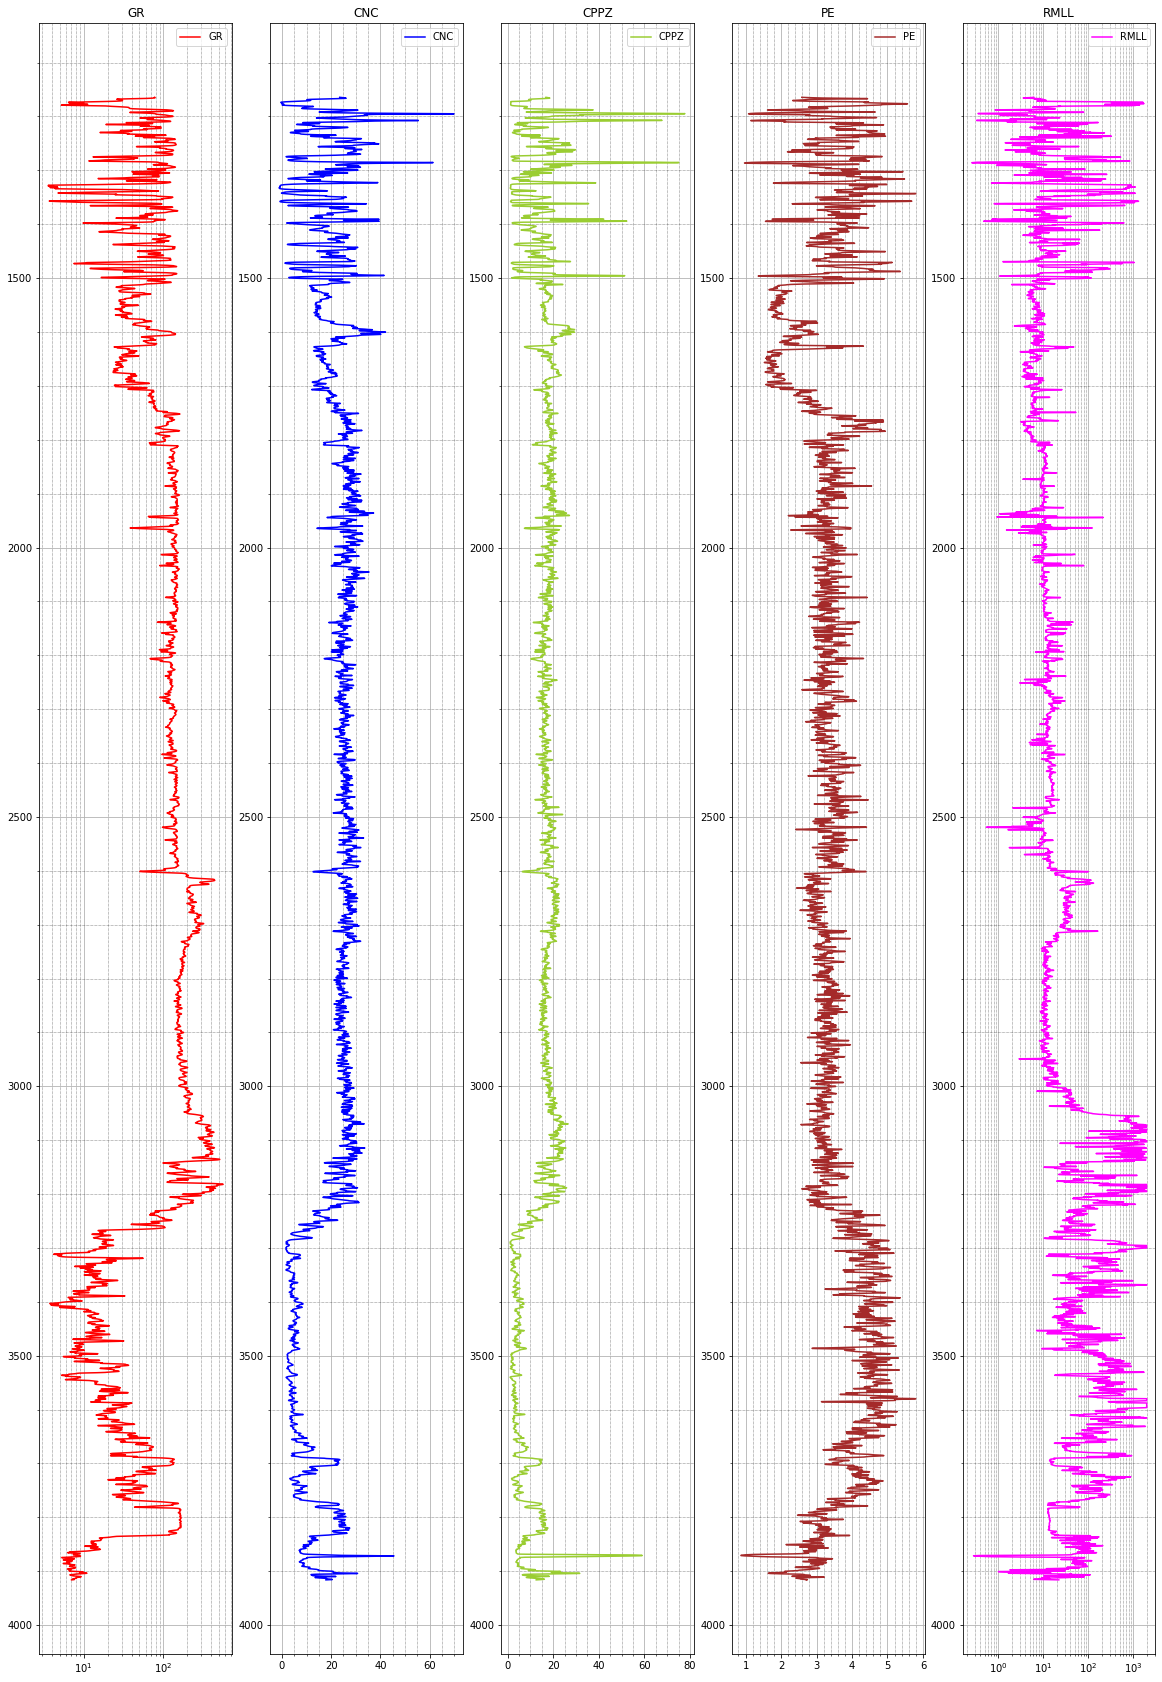

In [13]:
i = 0 #change i to see more graphs
imax = i + 5
j = 0 #j is to count from 0 to 4
jmax = 5 #We can only fit 5 plot on one screen (and still read it), so keep this at 5

#Choose ONE of the two lines of code
#Either choose a column number in lasdf in the first list for k
#OR choose to let the list of k be simply i to imax
#---------------------------------------------------------------------------------
k=[11,4,6,18,22] #List of items to plot
#k = np.arange(i, imax, 1)   #let k be a list from i to imax (increments of 1)
#---------------------------------------------------------------------------------

colors = ['red', 'blue','yellowgreen','brown','magenta']
fig,ax=plt.subplots(1,5,figsize=(20,30))
while (j<jmax):
    if (lasdf.iloc[:,k[j]].max() - lasdf.iloc[:,k[j]].min())>200:
        ax[j].semilogx(lasdf.iloc[:,k[j]],lasdf.iloc[:,0], color=colors[j], label = cname[k[j]])
    else:
        ax[j].plot(lasdf.iloc[:,k[j]],lasdf.iloc[:,0], color=colors[j], label = cname[k[j]])
    ax[j].invert_yaxis()
    ax[j].legend()
    ax[j].set_title(cname[k[j]])
    ax[j].grid(True)
    ax[j].grid(which='minor', color='#111111', linestyle=':', linewidth=0.5)
    ax[j].minorticks_on()
    i+=1
    j+=1

plt.show()

We can repeat the last step to look at other variables by simply changing the values in the "k" list or cycling through the columns in the data frame from i to imax. 


After looking through the logs, I like to take advantage of the seaborn pair plotting function to again look for outliers in the data.  In this particular LAS file there are 26 variables, far too many to plot with the pair-wise plotting function.  More than about 8 variables the plots become too small to appreciate the information, so we will limit the plotting to a list of eight variables.  Below is a list of the eight we will use for this demonstration:

In [14]:
k=[3,4,6,11,17,18, 22, 25]
range(len(k))
varlist=[]
for j in range(len(k)): varlist.append(cname[k[j]])

varlist

['CAL', 'CNC', 'CPPZ', 'GR', 'MLR4C', 'PE', 'RMLL', 'ZDEN']

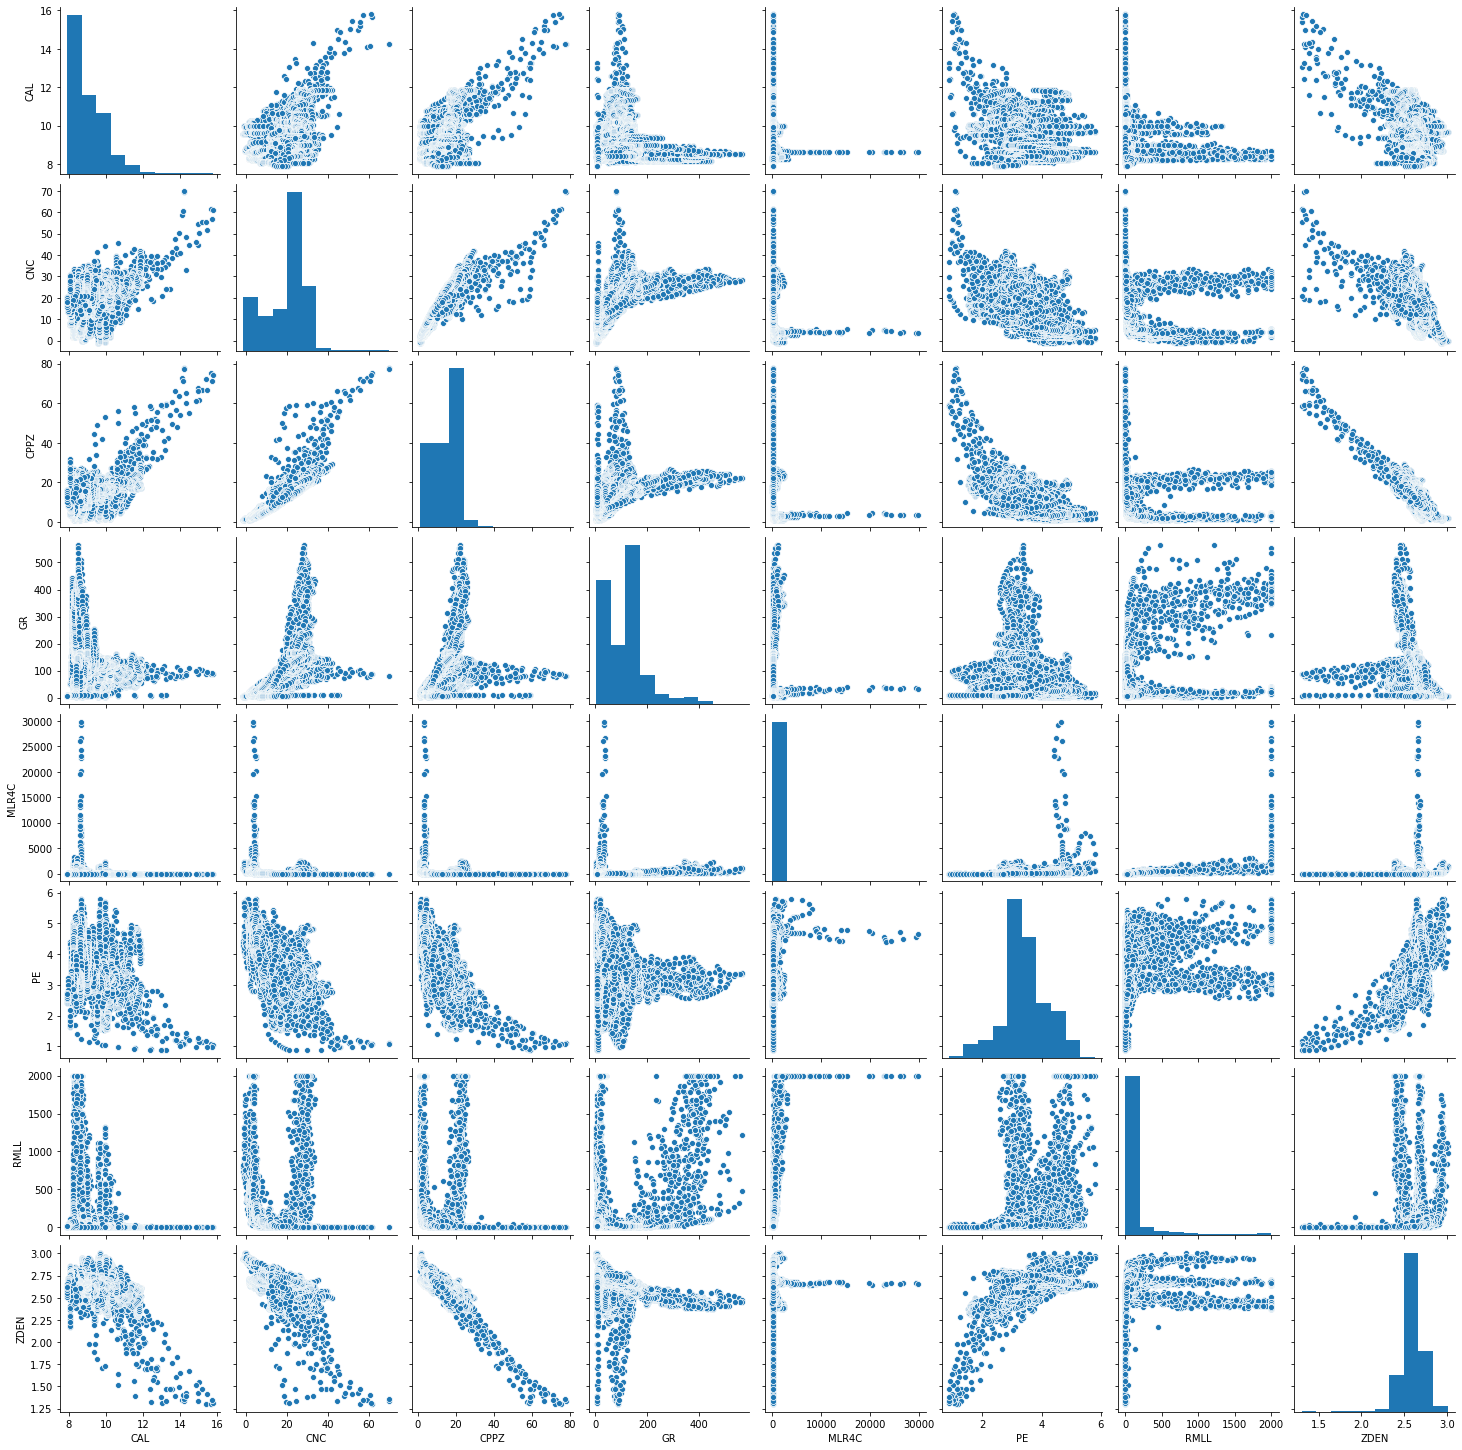

In [15]:
sns.pairplot(lasdf, vars=varlist)